<h1>Flight Prediction using past data (BOM-BLR) </h1>
This is a part of the capstone project that I am doing for Udacity, as well as an experimental concept that I am looking to validate in the market as well. 
Objective of the exercise is to be able to predict prices of certain routes <x> days in advance (x being 7 to start with), and basically looking to guage whether we can predict the same with 90% accuracy at least 7 days in advance. 

This would also be key to enable us to tell users when prices are likely to drop (deal watch) and increase (book now, alerts)

<h3>Step 1: Getting the training data, and the usual inclusions of libraries </h3>
Simple starting point. Run this only once every time, as it downloads the file into the dataframe, so is going to be a little time-consuming

In [67]:
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#import renders as rs
import pandas as pd
df = pd.read_csv("https://offtrack.in/hotel/train_price.csv")
print df.shape
print "done getting the training file"
print "DONT RUN THIS CELL AGAIN THIS SESSION"

(232662, 9)
done getting the training file
DONT RUN THIS CELL AGAIN THIS SESSION


<h3>Step 2: Basic data sanity verification</h3>
- What was the date on which the file was generated. 
- Last insert date. 
- First insert date. 
- How many entries for bombay (or whichever city you are analyzing)

Basically, just validating whether the data is clean, and there are no breaks. This is NOT a data analysis step (that would come up next). 

how many for BKK?
(31486, 9)
------


,insert_date,travel_date,location,daytotravel,day,intensity,min_price_input,daytobook,min_price_output
0,2016-12-06,2016-12-08,BKK,2,Thu,0,11307.0,1,11307.0
1,2016-12-06,2016-12-09,BKK,3,Fri,0,10879.0,1,10879.0
2,2016-12-06,2016-12-10,BKK,4,Sat,0,10879.0,1,10879.0


earliest insert date - 2016-12-06 00:00:00
most recent insert date - 2017-01-12
------


/Users/dhara/python/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


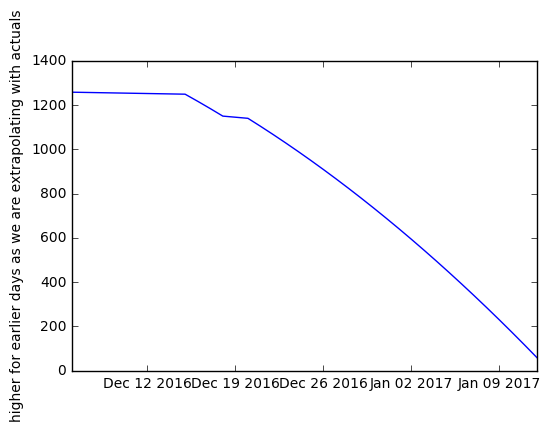

------
done


In [113]:
strcity = "BKK"
dfmum = df[df["location"] == strcity]
print "how many for " + strcity + "?"
print dfmum.shape
print "------"
display(dfmum.head(3))
dfmum['insert_date'] = pd.to_datetime(dfmum['insert_date'])
least_recent_date = dfmum['insert_date'].min()
recent_date = df['insert_date'].max()
print "earliest insert date - " + str(least_recent_date)
print "most recent insert date - " + str(recent_date)
print "------"
dist = dfmum.groupby(['insert_date'])['day'].count()
import matplotlib.pyplot as plt
plt.plot(dist)
plt.ylabel('higher for earlier days as we are extrapolating with actuals')
plt.show()
#display(dist)
print "------"
print "done"

<h3>Step 3: Now getting down to basic data analysis, and correlations etc</h3>
- Average of price, min, max price
- Distribution of the prices
- Average plotted with days to book
- Correlation of all factors, scatter matrixes
<i>
  - Specifically, price to day to book
  - Price to day to travel
  - Price basis day
  </i>
  

,daytotravel,intensity,min_price_input,daytobook,min_price_output
count,31486.000000,31486.000000,31486.000000,31486.000000,31486.000000
mean,35.924061,0.026329,8436.203043,10.848123,8884.520866
std,14.834610,0.160115,1530.434909,7.513392,1932.762038
min,2.000000,0.000000,6538.000000,1.000000,6538.000000
25%,24.000000,0.000000,7454.000000,4.000000,7452.000000
50%,37.000000,0.000000,7984.000000,9.000000,8482.000000
75%,49.000000,0.000000,9107.000000,16.000000,10034.000000
max,60.000000,1.000000,20806.000000,29.000000,20806.000000


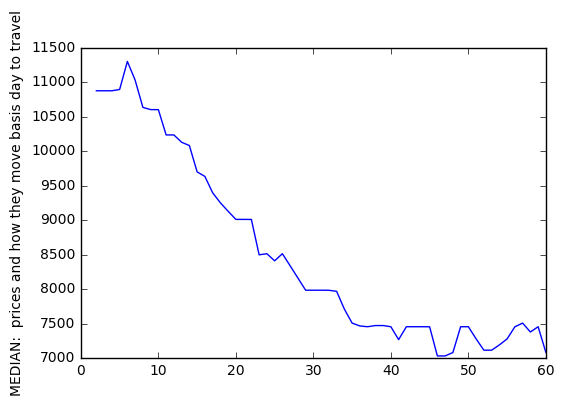

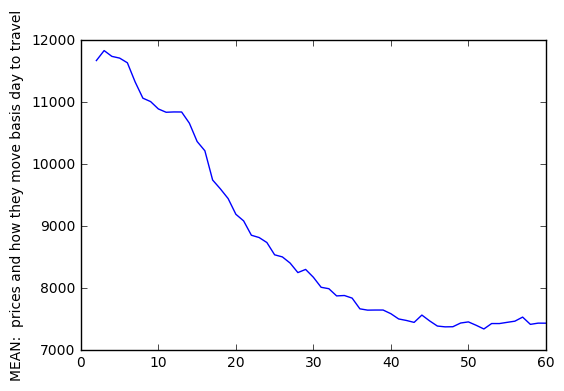

------
  insert_date travel_date location  daytotravel  day  intensity  \
0  2016-12-06  2016-12-08      BKK            2  Thu          0   
1  2016-12-06  2016-12-09      BKK            3  Fri          0   
2  2016-12-06  2016-12-10      BKK            4  Sat          0   

   min_price_input  daytobook  min_price_output  
0          11307.0          1           11307.0  
1          10879.0          1           10879.0  
2          10879.0          1           10879.0  


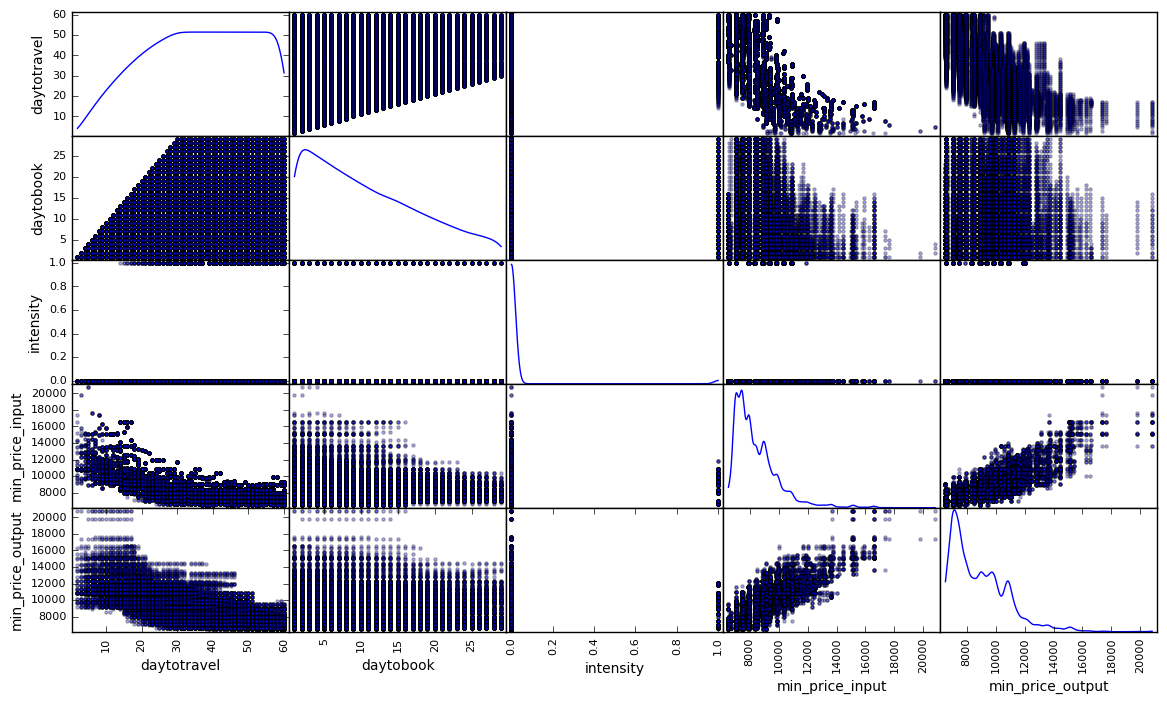

31486
-----
finally, done...


In [114]:
#mean, median etc of all items
display(dfmum.describe())

#day to travel, 
pricedist = dfmum[dfmum['daytobook'] == 1].groupby(['daytotravel'])['min_price_input'].median()
import matplotlib.pyplot as plt
plt.plot(pricedist)
plt.ylabel('MEDIAN:  prices and how they move basis day to travel')
plt.show()
pricedist = dfmum[dfmum['daytobook'] == 1].groupby(['daytotravel'])['min_price_input'].mean()
plt.plot(pricedist)
plt.ylabel('MEAN:  prices and how they move basis day to travel')
plt.show()
print "------"
print(dfmum.head(3))
dfmum.corr()
dfplot  = dfmum[["daytotravel","daytobook", "day","intensity","min_price_input","min_price_output"]]
#display(dfplot.head)
dfplot.shape
pd.scatter_matrix(dfplot, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()
print len(dfmum.index)
#plt.scatter(dfmum["day"], dfmum["min_price_output"])
#plt.show()
print "-----"
import pandas as pd
from pandas.tools.plotting import bootstrap_plot
print "finally, done..."

<h3>Step 4: Specific hypothesis's that I would want to validate</h3>
1. Does when I book (days in advance) have a bearing on the price
2. Does day have a bearing on the price
3. As I get closer to the date, how does the pricing move


In [107]:
import numpy as np
#do this when I have the time. Now I need the output

<h3>Step 5: Factor analysis, try latent factor, as well as seeing if would like to merge the data etc. </h3>

In [108]:
#do this when I am ready

<h3>Step 6: Remove the outliars, sanitize the data for any irregularities. </h3>

In [109]:
#do this when ready

<h3>Step 7: Prep the data... Create seperate training and test sets<h3>

In [117]:
#this is it
dfmumenc = pd.concat([dfmum, pd.get_dummies(dfmum["day"])], axis=1)
print "This is the size of Mumbai data"
print dfmumenc.shape


dftrain = dfmumenc[dfmumenc["insert_date"] >= '2016-12-26'][dfmumenc["insert_date"] <= '2017-01-03']
print "This is the size of the training data"
print dftrain.shape

dftest = dfmumenc[dfmumenc["insert_date"] == '2017-01-12']
print "This is the size of the testing data"
print dftest.shape

#dftestinterim = dftest
dftrainout = dftrain["min_price_output"]
dftestout = dftest["min_price_output"]
datearr = dftest["travel_date"]

print type(datearr)

dftrain.drop(['insert_date', 'travel_date', 'location','day', 'min_price_output'], axis = 1, inplace = True)
dftest.drop(['insert_date', 'travel_date', 'location','day', 'min_price_output'], axis = 1, inplace = True)
display(dftest.head(3))

This is the size of Mumbai data
(31486, 16)
This is the size of the training data
(6585, 16)
This is the size of the testing data
(59, 16)
<class 'pandas.core.series.Series'>


/Users/dhara/python/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/dhara/python/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,daytotravel,intensity,min_price_input,daytobook,Fri,Mon,Sat,Sun,Thu,Tue,Wed
2773,2,0,10868.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2774,3,0,11305.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2775,4,0,11305.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<h3>Step 8: The regressors etc all coming into place</h3>
This is where it really comes together. Getting the random forest this time. 
Training data - taking for a period that is more than 3 weeks off. Which is large actually. How can it perform so well, is somethign which still stuns me. Sure something is wrong

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

regname = ["rf","linear","dt3","dt5","knn3","knn5","svr"]
reg1 = RandomForestRegressor(min_samples_split=5, n_estimators=10)
reg2 = LinearRegression()
reg3 = DecisionTreeRegressor(max_depth=3)
reg4 = DecisionTreeRegressor(max_depth=5)
reg5 = KNeighborsRegressor(n_neighbors=3)
reg6 = KNeighborsRegressor(n_neighbors=5)
reg7 = svm.SVR()

<h3>Test the data on the train and test set</h3>
287 points is what is there in the training set. Using this, it needs to predict the test set. How does it work... 60 points to be predicted
Trainign data is alright, it doesnt even have data more than 

Not dropping the data in the test set, as we would want to thread it together to visualize the data again coming back in later. 
<h3 style="color:red">How does it tie in with the benchmark. Plot the same against the benchmark value (price when seen last week. basically last price known)
</h3>

score on train data for rf
0.976
score on test data is
0.79
File name is check_val_rf.csv
Falsly predicted : 6
Correctly predicted : 44
Error % is 12.0


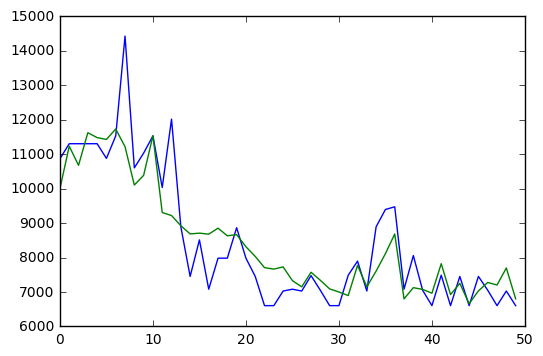

-------
score on train data for linear
0.779
score on test data is
0.853
File name is check_val_linear.csv
Falsly predicted : 1
Correctly predicted : 49
Error % is 2.0


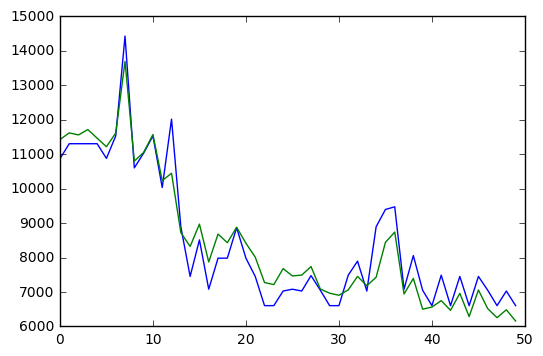

-------
score on train data for dt3
0.78
score on test data is
0.646
File name is check_val_dt3.csv
Falsly predicted : 14
Correctly predicted : 36
Error % is 28.0


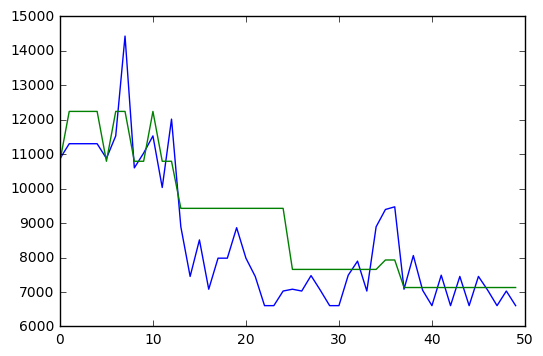

-------
score on train data for dt5
0.859
score on test data is
0.772
File name is check_val_dt5.csv
Falsly predicted : 8
Correctly predicted : 42
Error % is 16.0


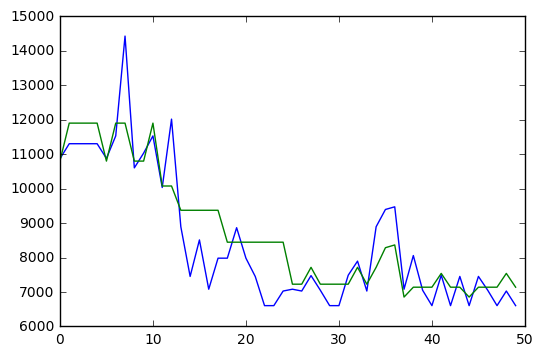

-------
score on train data for knn3
0.971
score on test data is
0.769
File name is check_val_knn3.csv
Falsly predicted : 6
Correctly predicted : 44
Error % is 12.0


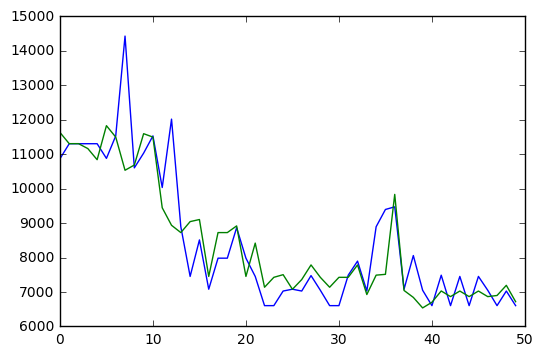

-------
score on train data for knn5
0.963
score on test data is
0.804
File name is check_val_knn5.csv
Falsly predicted : 5
Correctly predicted : 45
Error % is 10.0


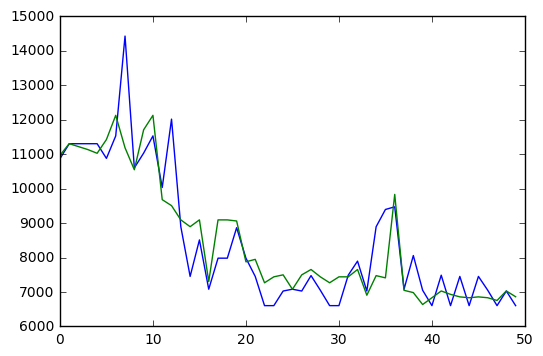

-------
score on train data for svr
-0.079
score on test data is
-0.048
File name is check_val_svr.csv
Falsly predicted : 24
Correctly predicted : 26
Error % is 48.0


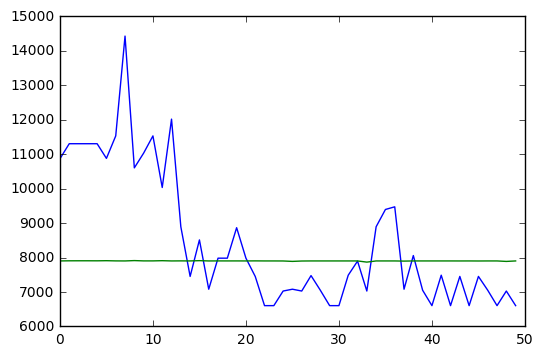

-------


In [118]:
#dftest.drop(['insert_date', 'travel_date', 'location','day','pc_within_10pc','sale_velosity'], axis = 1, inplace = True)
dfactualtest = df
regctr = 0
from sklearn.metrics import r2_score
for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7]:
    reg.fit(dftrain, dftrainout)
    ret = reg.predict(dftrain)
    #print dftest[["daytotravel","day","intensity","min_price","1","2","3","4","5","6","7"]]
    print "score on train data for " + regname[regctr] 
    print round(r2_score (dftrainout, ret), 3)
    
    #GOT THE PROBLEM. I NEED TO SEND THE LAST KNOWN PRICE NOT TODAYS PRICE. WITH THIS, IT AREADY KNOWS ANSWER
    #display(dftest.head(2))
    ret = reg.predict(dftest)
    print "score on test data is"
    print round(r2_score (dftestout, ret), 3)
    filename = "check_val_" + regname[regctr] + ".csv"

    f = open(filename, "w+")
    print "File name is " + filename
    regctr += 1

    #print "count of vals is " + str(dftest.count)
    falsect = 0
    truect = 0
    arr = []
    for i in range(0, 50):
        #print i
        f.write(datearr.iloc[i] + "," )
        f.write(str(dftestout.iloc[i]) + ",")
        f.write(str(ret[i]))
        arr.append([dftestout.iloc[i], ret[i]])
        #print abs((dftestout.iloc[i]-ret[i])/dftestout.iloc[i])
        if ((abs((dftestout.iloc[i]-ret[i])/dftestout.iloc[i]) > 0.15) and (abs(dftestout.iloc[i]-ret[i])) > 400):
            f.write("false\n")
            falsect = falsect + 1
        else:
            f.write("true\n")
            truect = truect + 1
    print "Falsly predicted : " + str(falsect) 
    print "Correctly predicted : " + str(truect)
    print "Error % is " + str(round((float(falsect) / (falsect + truect))*100, 1))
    plt.plot(arr)
    plt.show()
    print "-------"
    f.close()